# Инструменты для работы с языком

... или зачем нужна предобработка.

## Задача: классификация твитов по тональности

У нас есть датасет из твитов, про каждый указано, как он эмоционально окрашен: положительно или отрицательно. Задача: предсказывать эмоциональную окраску.

Классификацию по тональности используют в рекомендательных системах, чтобы понять, понравилось ли людям кафе, кино, etc.

Скачиваем куски датасета ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv).

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [5]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

In [6]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

## Baseline: классификация необработанных n-грамм

### Векторизаторы

In [14]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer

Что такое n-граммы:

In [8]:
from nltk import ngrams

In [9]:
sent = 'Если б мне платили каждый раз'.split()
list(ngrams(sent, 1)) # униграммы

[('Если',), ('б',), ('мне',), ('платили',), ('каждый',), ('раз',)]

In [10]:
list(ngrams(sent, 2)) # биграммы

[('Если', 'б'),
 ('б', 'мне'),
 ('мне', 'платили'),
 ('платили', 'каждый'),
 ('каждый', 'раз')]

In [11]:
list(ngrams(sent, 3)) # триграммы

[('Если', 'б', 'мне'),
 ('б', 'мне', 'платили'),
 ('мне', 'платили', 'каждый'),
 ('платили', 'каждый', 'раз')]

In [12]:
list(ngrams(sent, 5)) # ... пентаграммы?

[('Если', 'б', 'мне', 'платили', 'каждый'),
 ('б', 'мне', 'платили', 'каждый', 'раз')]

Самый простой способ извлечь фичи из текстовых данных -- векторизаторы: `CountVectorizer` и `TfidfVectorizer`

Объект `CountVectorizer` делает простую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

In [15]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

ngram_range отвечает за то, какие n-граммы мы используем в качестве фичей:<br/>
ngram_range=(1, 1) -- униграммы<br/>
ngram_range=(3, 3) -- триграммы<br/>
ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

В vec.vocabulary_ лежит словарь: мэппинг слов к их индексам:

In [16]:
list(vec.vocabulary_.items())[:10]

[('nextjoke', 63141),
 ('nalekseyeva', 61234),
 ('умрём', 227844),
 ('games', 33700),
 ('7t', 5337),
 ('украинцев', 227215),
 ('fcl3iqqt4k', 31264),
 ('ву', 116200),
 ('гостинке', 121558),
 ('axmatovaaa', 15859)]

In [17]:
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

   negative       0.77      0.76      0.76     28310
   positive       0.76      0.77      0.77     28399

avg / total       0.77      0.77      0.77     56709



In [19]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:
[v for v in dir(clf) if '__' not in v]

['C',
 '_estimator_type',
 '_get_param_names',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

Попробуем сделать то же самое для триграмм:

In [22]:
vec = CountVectorizer(ngram_range=(3, 3))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

   negative       0.47      0.72      0.57     18424
   positive       0.82      0.61      0.70     38285

avg / total       0.70      0.65      0.66     56709



(как вы думаете, почему в результатах теперь такой разброс по сравнению с униграммами?)

## TF-IDF векторизация

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений – tf-idf каждого слова.

Как считается tf-idf:

TF (term frequency) – относительная частотность слова в документе:
$$ TF(t,d) = \frac{n_{t}}{\sum_k n_{k}} $$

IDF (inverse document frequency) – обратная частота документов, в которых есть это слово:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

Перемножаем их:
$$TFIDF_(t,d,D) = TF(t,d) \times IDF(i, D)$$

Сакральный смысл – если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом 
количестве документов, у него высокий TF-IDF.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

   negative       0.74      0.77      0.75     26711
   positive       0.79      0.75      0.77     29998

avg / total       0.76      0.76      0.76     56709



В этот раз получилось хуже :( Вернёмся к `CountVectorizer`.

## Токенизация

Токенизировать -- значит, поделить текст на слова, или *токены*.

Самый наивный способ токенизировать текст -- разделить с помощью `split`. Но `split` упускает очень много всего, например, банально не отделяет пунктуацию от слов. Кроме этого, есть ещё много менее тривиальных проблем. Поэтому лучше использовать готовые токенизаторы.

In [16]:
from nltk.tokenize import word_tokenize

In [78]:
example = 'Но не каждый хочет что-то исправлять:('
word_tokenize(example)

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять', ':', '(']

В nltk вообще есть довольно много токенизаторов:

In [16]:
from nltk import tokenize
dir(tokenize)[:16]

['BlanklineTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'PunktSentenceTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer',
 'TreebankWordTokenizer',
 'TweetTokenizer',
 'WhitespaceTokenizer',
 'WordPunctTokenizer']

Они умеют выдавать индексы начала и конца каждого токена:

In [79]:
wh_tok = tokenize.WhitespaceTokenizer()
list(wh_tok.span_tokenize(example))

[(0, 2), (3, 5), (6, 12), (13, 18), (19, 25), (26, 38)]

(если вам было интересно, зачем вообще включать в модуль токенизатор, который работает как `.split()` :))

Некторые токенизаторы ведут себя специфично:

In [18]:
tokenize.TreebankWordTokenizer().tokenize("don't stop me")

['do', "n't", 'stop', 'me']

Для некоторых задач это может быть полезно.

А некоторые -- вообще не для текста на естественном языке (не очень понятно, зачем это в nltk :)):

In [51]:
tokenize.SExprTokenizer().tokenize("(a (b c)) d e (f)")

['(a (b c))', 'd', 'e', '(f)']

## Стоп-слова и пунктуация

*Стоп-слова* -- это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе, то есть играют роль шума. Поэтому их принято убирать. По той же причине убирают и пунктуацию.

In [22]:
# у вас здесь, вероятно, выскочит ошибка и надо будет загрузить стоп слова (в тексте ошибки написано, как)
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [24]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
noise = stopwords.words('russian') + list(punctuation)

В векторизаторах за стоп-слова, логичным образом, отвечает аргумент `stop_words`.

In [38]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

   negative       0.80      0.76      0.78     29306
   positive       0.76      0.80      0.78     27403

avg / total       0.78      0.78      0.78     56709



Получилось чууть лучше. Что ещё можно сделать?

## Лемматизация

Лемматизация – это сведение разных форм одного слова к начальной форме – *лемме*. Почему это хорошо?
* Во-первых, мы хотим рассматривать как отдельную фичу каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лематизации выкидываем мы только её.

Для русского есть два хороших лемматизатора: mystem и pymorphy:

### [Mystem](https://tech.yandex.ru/mystem/)
Как с ним работать:
* можно скачать mystem и запускать [из терминала с разными параметрами](https://tech.yandex.ru/mystem/doc/)
* [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) - обертка для питона, работает медленнее, но это удобно

In [20]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

Мы инициализировали Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin - путь к `mystem`, если их несколько
* grammar_info - нужна ли грамматическая информация или только леммы (по дефолту нужна)
* disambiguation - нужно ли снятие омонимии - дизамбигуация (по дефолту нужна)
* entire_input - нужно ли сохранять в выводе все (пробелы всякие, например), или можно выкинуть (по дефолту оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно, конечно, и пословно анализировать, но тогда он не сможет учитывать контекст.

Можно просто лемматизировать текст:

In [80]:
print(mystem_analyzer.lemmatize(example))

['но', ' ', 'не', ' ', 'каждый', ' ', 'хотеть', ' ', 'что-то', ' ', 'исправлять', ':(\n']


А можно получить грамматическую информацию:

In [82]:
mystem_analyzer.analyze(example)

[{'analysis': [{'gr': 'CONJ=', 'lex': 'но'}], 'text': 'Но'},
 {'text': ' '},
 {'analysis': [{'gr': 'PART=', 'lex': 'не'}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'gr': 'APRO=(вин,ед,муж,неод|им,ед,муж)', 'lex': 'каждый'}],
  'text': 'каждый'},
 {'text': ' '},
 {'analysis': [{'gr': 'V,несов,пе=непрош,ед,изъяв,3-л', 'lex': 'хотеть'}],
  'text': 'хочет'},
 {'text': ' '},
 {'analysis': [{'gr': 'SPRO,ед,сред,неод=(вин|им)', 'lex': 'что-то'}],
  'text': 'что-то'},
 {'text': ' '},
 {'analysis': [{'gr': 'V,пе=инф,несов', 'lex': 'исправлять'}],
  'text': 'исправлять'},
 {'text': ':(\n'}]

Давайте терепь лемматизатор майстема в качестве токенизатора.

In [64]:
import re
def my_preproc(text):
    text = re.sub('[{}]'.format(punctuation), '', text)
    text = mystem_analyzer.lemmatize(text)
    return [word for word in text if word not in stopwords.words('russian') + [' ', '\n']]

In [65]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=my_preproc)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

   negative       0.78      0.74      0.76     29392
   positive       0.74      0.77      0.75     27317

avg / total       0.76      0.76      0.76     56709



### [Pymorphy](http://pymorphy2.readthedocs.io/en/latest/)
Это модуль на питоне, довольно быстрый и с кучей функций.

In [69]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

pymorphy2 работает с отдельными словами. Если дать ему на вход предложение - он его просто не лемматизирует, т.к. не понимает

In [72]:
ana = pymorphy2_analyzer.parse(sent[3])
ana

[Parse(word='платили', tag=OpencorporaTag('VERB,impf,tran plur,past,indc'), normal_form='платить', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'платили', 2368, 10),))]

In [82]:
ana[0].normal_form

'платить'

А теперь напишите аналогичную функцию для лемматизации с pymorphy2:

Что будет, если использовать её в качестве препроцессора? 

### mystem vs. pymorphy

1) *Мы надеемся, что вы пользуетесь линуксом*, но mystem работает невероятно медленно под windows на больших текстах.

2) *Снятие омонимии*. Mystem умеет снимать омонимию по контексту (хотя не всегда преуспевает), pymorphy2 берет на вход одно слово и соответственно вообще не умеет дизамбигуировать по контексту:

In [24]:
homonym1 = 'За время обучения я прослушал больше сорока курсов.'
homonym2 = 'Сорока своровала блестящее украшение со стола.'
mystem_analyzer = Mystem() # инициализирую объект с дефолтными параметрами

print(mystem_analyzer.analyze(homonym1)[-5])
print(mystem_analyzer.analyze(homonym2)[0])

{'text': 'сорока', 'analysis': [{'gr': 'NUM=(пр|дат|род|твор)', 'lex': 'сорок'}]}
{'text': 'Сорока', 'analysis': [{'gr': 'S,жен,од=им,ед', 'lex': 'сорока'}]}


## Словарь, закон Ципфа и закон Хипса

Закон Ципфа -- эмпирическая закономерность: если все слова корпуса текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n. Иными словами, частотность слов убывает очень быстро.

In [15]:
from collections import Counter

In [25]:
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

2859142


['first_timee', 'хоть', 'я', 'и', 'школота', 'но', 'поверь', 'у', 'нас', 'то']

In [26]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('не', 69267),
 ('и', 54916),
 ('в', 52853),
 ('я', 52506),
 ('RT', 38070),
 ('на', 35715),
 ('http', 32992),
 ('что', 31472),
 ('...', 28773),
 ('с', 27176)]

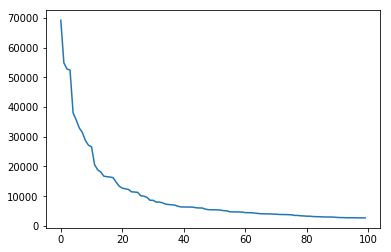

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

Закон Хипса -- обратная сторона закона Ципфа. Он описывает, что чем больше корпус, тем меньше новых слов добавляется с добавлением новых текстов. В какой-то момент корпус насыщается.

## О важности эксплоративного анализа

Но иногда пунктуация бывает и не шумом -- главное отталкиваться от задачи. Что будет если вообще не убирать пунктуацию?

In [16]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

   negative       1.00      1.00      1.00     27764
   positive       1.00      1.00      1.00     28945

avg / total       1.00      1.00      1.00     56709



Шок! Стоило оставить пунктуацию -- и все метрики равны 1. Как это получилось? Среди неё были очень значимые токены (как вы думаете, какие?). Найдите фичи с самыми большими коэффициэнтами:

Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [37]:
cool_token = 
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

   negative       1.00      0.85      0.92     32733
   positive       0.83      1.00      0.91     23976

avg / total       0.93      0.91      0.91     56709



## Символьные n-граммы

Теперь в качестве фичей используем, например, униграммы символов:

In [39]:
vec = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

   negative       0.99      1.00      1.00     27667
   positive       1.00      0.99      1.00     29042

avg / total       1.00      1.00      1.00     56709



В общем-то, теперь уже понятно, почему на этих данных здесь 1. Так или инчае, на символах классифицировать тоже можно: для некторых задач (например, для определения языка) фичи-символьные n-граммы решительно рулят.

Ещё одна замечательная особенность фичей-символов: токенизация и лемматизация не нужна, можно использовать такой подход для языков, у которых нет готвых анализаторов.

## Depencency parsing (парсинг зависимостей)
 (если осталось время)

### Что это?

* наша цель -- представить предложение естественного языка в виде дерева
* слова предложения -- вершины; *зависимости (dependencies)* между ними -- рёбра
* зависимости могут быть разными: например, субъект глагола, объект глагола, прилагательное-модификатор, и так далее

### Формат

Существует несколько форматов записи деревьев зависимостей, но самый популярный и общеиспользуемый -- [CoNLL-U](http://universaldependencies.org/format.html).<br/>
Как это выглядит (пример из [русского Universal Dependency трибанка](https://github.com/UniversalDependencies/UD_Russian-SynTagRus)):

In [1]:
my_example = """
# sent_id = 2003Armeniya.xml_138
# text = Перспективы развития сферы высоких технологий.
1	Перспективы	перспектива	NOUN	_	Animacy=Inan|Case=Nom|Gender=Fem|Number=Plur	0	root	0:root	_
2	развития	развитие	NOUN	_	Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing	1	nmod	1:nmod	_
3	сферы	сфера	NOUN	_	Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing	2	nmod	2:nmod	_
4	высоких	высокий	ADJ	_	Case=Gen|Degree=Pos|Number=Plur	5	amod	5:amod	_
5	технологий	технология	NOUN	_	Animacy=Inan|Case=Gen|Gender=Fem|Number=Plur	3	nmod	3:nmod	SpaceAfter=No
6	.	.	PUNCT	_	_	1	punct	1:punct	_
"""

Комментарии + таблица c 9 колонками (разделители табы):
* ID
* FORM: токен
* LEMMA: начальная форма
* UPOS: универсальная часть речи
* XPOS: лингво-специфичная часть речи
* FEATS: морфологическая информация: падеж, род, число etc
* HEAD: id ролителя
* DEPREL: тип зависимости, то есть отношение к токену-родителю
* DEPS: альтернативный подграф (не будем углубляться :))
* MISC: всё остальное

Отсутствующие данные представляются с помощью `_`. Больше подробностей про формат -- в [официальной документаци](http://universaldependencies.org/format.html).<br>
User-friendly визуализация: ![2003Armeniya.xml_138](rus_tree.png)

Отрытый инструмент для визуализации, ручной разметки и конвертации в другие форматы: UD Annotatrix. [Online-интерфейс](https://maryszmary.github.io/ud-annotatrix/standalone/annotator.html), [репозиторий](https://github.com/jonorthwash/ud-annotatrix).

Трибанк -- много таких предложений. Обычно они разделяются двумя переносами строки.
### Как считывать данные в питоне

Используем библиотеку [conllu](https://github.com/EmilStenstrom/conllu).

In [2]:
!pip3 install conllu
from conllu import parse

In [3]:
help(parse)

Help on function parse in module conllu.parser:

parse(text, fields=('id', 'form', 'lemma', 'upostag', 'xpostag', 'feats', 'head', 'deprel', 'deps', 'misc'))



In [5]:
sentences = parse(my_example)
sentence = sentences[0]
sentence[0]

OrderedDict([('id', 1),
             ('form', 'Перспективы'),
             ('lemma', 'перспектива'),
             ('upostag', 'NOUN'),
             ('xpostag', None),
             ('feats',
              OrderedDict([('Animacy', 'Inan'),
                           ('Case', 'Nom'),
                           ('Gender', 'Fem'),
                           ('Number', 'Plur')])),
             ('head', 0),
             ('deprel', 'root'),
             ('deps', [('root', 0)]),
             ('misc', None)])

In [6]:
sentence[-1]

OrderedDict([('id', 6),
             ('form', '.'),
             ('lemma', '.'),
             ('upostag', 'PUNCT'),
             ('xpostag', None),
             ('feats', None),
             ('head', 1),
             ('deprel', 'punct'),
             ('deps', [('punct', 1)]),
             ('misc', None)])

### Визуализация

В nltk есть DependencyGraph, который умеет рисовать деревья (и ещё многое другое). Для того, чтобы визуализация работала корректно, ему нужна зависимость: graphviz.

```
sudo apt-get install graphviz
pip3 install graphviz
```

In [18]:
from nltk import DependencyGraph

В отличие от `conllu`, `DependencyGraph` не справляется с комментариями, поэтому придётся их убрать.

In [93]:
sents = []
for sent in parsed.split('\n\n'):
    sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')])
    sents.append(sent)

/usr/local/lib/python3.5/dist-packages/nltk/parse/dependencygraph.py:380: UserWarning: The graph doesn't contain a node that depends on the root element.
  "The graph doesn't contain a node "


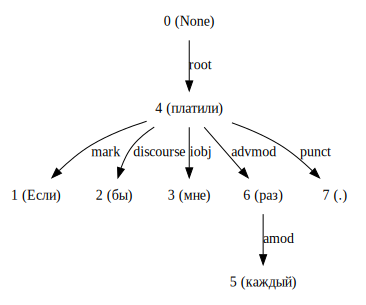

In [95]:
graph = DependencyGraph(tree_str=sents[0])
graph

### UDPipe

Есть разные инструменты для парсинга зависимостей. Сегодня мы будем рабтать с [UDPipe](http://ufal.mff.cuni.cz/udpipe). UDPipe умеет парсить текст с помощью готовых моделей (которые можно скачать [здесь](https://github.com/jwijffels/udpipe.models.ud.2.0/tree/master/inst/udpipe-ud-2.0-170801)) и обучать модели на своих трибанках.

Собственно, в UDPipe есть три вида моделей:
* токенизатор (разделить предложение не токены, сделать заготовку для CoNLL-U)
* тэггер (разметить части речи)
* сам парсер (проставить каждому токену `head` и `deprel`)

Мы сегодня не будем обучать новых моделей (это слишком долго), а используем готовую модель для русского.

#### The Python binding

У udpipe есть питоновская обвязка. Она довольно [плохо задокументирована](https://pypi.org/project/ufal.udpipe/), но зато можно использовать прямо в питоне :)

In [7]:
!pip3 install ufal.udpipe
from ufal.udpipe import Model, Pipeline

In [8]:
model = Model.load("russian-ud-2.0-170801.udpipe") # path to the model

In [34]:
# если успех, должно быть так
model

<Swig Object of type 'model *' at 0x7fb174878180>

In [10]:
pipeline = Pipeline(model, 'generic_tokenizer', '', '', '')
example = "Если бы мне платили каждый раз. Каждый раз, когда я думаю о тебе."
parsed = pipeline.process(example)
print(parsed)

# newdoc
# newpar
# sent_id = 1
# text = Если бы мне платили каждый раз.
1	Если	ЕСЛИ	SCONJ	IN	_	4	mark	_	_
2	бы	БЫ	PART	RP	_	4	discourse	_	_
3	мне	Я	PRON	PRP	Case=Dat|Number=Sing|Person=1	4	iobj	_	_
4	платили	ПЛАТИТЬ	VERB	VBC	Aspect=Imp|Mood=Ind|Number=Plur|Tense=Past|VerbForm=Fin	0	root	_	_
5	каждый	КАЖДЫЙ	DET	DT	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	6	amod	_	_
6	раз	РАЗ	NOUN	NN	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	4	advmod	_	SpaceAfter=No
7	.	.	PUNCT	.	_	4	punct	_	_

# sent_id = 2
# text = Каждый раз, когда я думаю о тебе.
1	Каждый	КАЖДЫЙ	DET	DT	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	2	amod	_	_
2	раз	РАЗ	NOUN	NN	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	6	advmod	_	SpaceAfter=No
3	,	,	PUNCT	,	_	6	punct	_	_
4	когда	КОГДА	ADV	WRB	_	6	advmod	_	_
5	я	Я	PRON	PRP	Case=Nom|Number=Sing|Person=1	6	nsubj	_	_
6	думаю	дУМАТЬ	VERB	VBC	Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	0	root	_	_
7	о	О	ADP	IN	_	8	case	_	_
8	тебе	ТЫ	PRON	PRP	Case=Dat|Number=

Как видим, UDPipe и токенизировал, и лематизировал текст, сделал POS-tagging и, собственно, синтаксический парсинг.

#### Command line interface

Но с обвязкой бывают проблемы, и вообще довольно удобно пользоваться прекомпилированной утилитой `udpipe` из шелла. Она скачивается [здесь](https://github.com/ufal/udpipe/releases/tag/v1.2.0): (надеюсь, вы уже скачали всё заранее).<br>Внутри бинарники для всех популярных ОС, выбираем свою. У меня путь к бинарнику такой: `~/Documents/udpipe-1.2.0-bin/bin-linux64`.

Синтаксис:

In [11]:
! udpipe

Usage: udpipe [running_opts] model_file [input_files]
       udpipe --train [training_opts] model_file [input_files]
       udpipe --detokenize [detokenize_opts] raw_text_file [input_files]
Running opts: --accuracy (measure accuracy only)
              --input=[conllu|generic_tokenizer|horizontal|vertical]
              --immediate (process sentences immediately during loading)
              --outfile=output file template
              --output=[conllu|epe|matxin|horizontal|plaintext|vertical]
              --tokenize (perform tokenization)
              --tokenizer=tokenizer options, implies --tokenize
              --tag (perform tagging)
              --tagger=tagger options, implies --tag
              --parse (perform parsing)
              --parser=parser options, implies --parse
Training opts: --method=[morphodita_parsito] which method to use
               --heldout=heldout data file name
               --tokenizer=tokenizer options
               --tagger=tagger options
      

Нас сегодня будет интересовать только парсинг, так что типичная команда будет выглядеть так:

In [12]:
with open('example.txt', 'w') as f:
    f.write(example)

! udpipe --tokenize --tag --parse russian-ud-2.0-170801.udpipe example.txt > parsed_example.conllu
! cat parsed_example.conllu

Loading UDPipe model: done.
# newdoc id = example.txt
# newpar
# sent_id = 1
# text = Если бы мне платили каждый раз.
1	Если	ЕСЛИ	SCONJ	IN	_	4	mark	_	_
2	бы	БЫ	PART	RP	_	4	discourse	_	_
3	мне	Я	PRON	PRP	Case=Dat|Number=Sing|Person=1	4	iobj	_	_
4	платили	ПЛАТИТЬ	VERB	VBC	Aspect=Imp|Mood=Ind|Number=Plur|Tense=Past|VerbForm=Fin	0	root	_	_
5	каждый	КАЖДЫЙ	DET	DT	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	6	amod	_	_
6	раз	РАЗ	NOUN	NN	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	4	advmod	_	SpaceAfter=No
7	.	.	PUNCT	.	_	4	punct	_	_

# sent_id = 2
# text = Каждый раз, когда я думаю о тебе.
1	Каждый	КАЖДЫЙ	DET	DT	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	2	amod	_	_
2	раз	РАЗ	NOUN	NN	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	6	advmod	_	SpaceAfter=No
3	,	,	PUNCT	,	_	6	punct	_	_
4	когда	КОГДА	ADV	WRB	_	6	advmod	_	_
5	я	Я	PRON	PRP	Case=Nom|Number=Sing|Person=1	6	nsubj	_	_
6	думаю	дУМАТЬ	VERB	VBC	Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	0	root	_	_
7	о	О	ADP	IN	_	8

(Ну а потом снова считываем проанализированные предложения питоном).

Вот два способа работать с UDPipe. Choose your fighter! 